In [1]:
!pip install pandas matplotlib seaborn wordcloud nltk sklearn transformers torch shap


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [ ]:
!pip uninstall -y sklearn
!pip install --upgrade scikit-learn


In [ ]:
!pip install --no-cache-dir --upgrade scikit-learn


In [ ]:
!pip uninstall -y sklearn scikit-learn


In [ ]:
!pip install --no-cache-dir --upgrade scikit-learn


In [ ]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
file_path = "new data set.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Fix column names (Remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Remove unnamed empty column if exists
df = df.drop(columns=[""], errors="ignore")

# Create 'Sentiment' column if missing
def classify_sentiment(rating):
    if rating >= 4.0:
        return "Positive"
    elif rating >= 3.0:
        return "Neutral"
    else:
        return "Negative"

if "Sentiment" not in df.columns:
    df["Sentiment"] = df["Ratings"].apply(classify_sentiment)

# Display dataset summary
print("Dataset Preview:")
display(df.head(10))


Dataset Preview:


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,E-Platform,Course Title,Ratings,Feedbacks,Sentiment
0,Udemy,The Data Science Course: Complete Data Science...,5.0,Este curso ÃƒÂ© muito interessante. Desde conc...,Positive
1,Udemy,The Data Science Course: Complete Data Science...,2.0,The course is really good and offers wide rang...,Negative
2,Udemy,The Data Science Course: Complete Data Science...,4.5,"I have learnt a lot about Data science, the ad...",Positive
3,Udemy,The Data Science Course: Complete Data Science...,5.0,The course was an incredible journey. While it...,Positive
4,Udemy,The Data Science Course: Complete Data Science...,2.5,"Love the overall course , it is well designed ...",Negative
5,Udemy,The Data Science Course: Complete Data Science...,3.0,"OVERALL it was a good orientation, but it some...",Neutral
6,Udemy,The Data Science Course: Complete Data Science...,5.0,Amazing course! All what is horrible in data s...,Positive
7,Udemy,The Data Science Course: Complete Data Science...,4.5,It was a really good way of getting to know th...,Positive
8,Udemy,The Data Science Course: Complete Data Science...,2.5,It looks like some dull was added to the cours...,Negative
9,Udemy,The Data Science Course: Complete Data Science...,5.0,As a Civil Engineer with a strong interest in ...,Positive


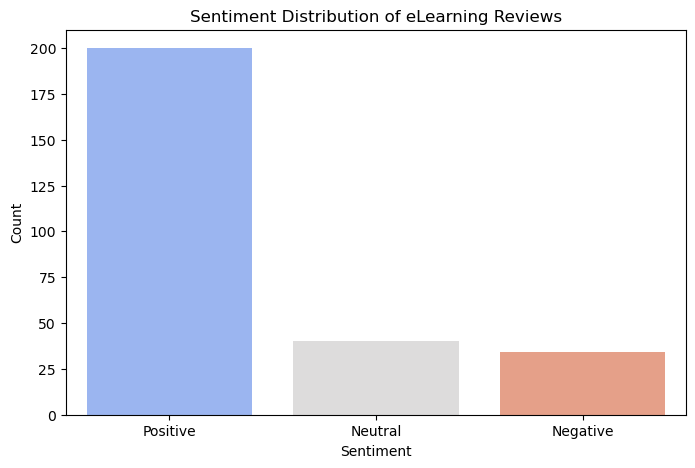

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution of eLearning Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


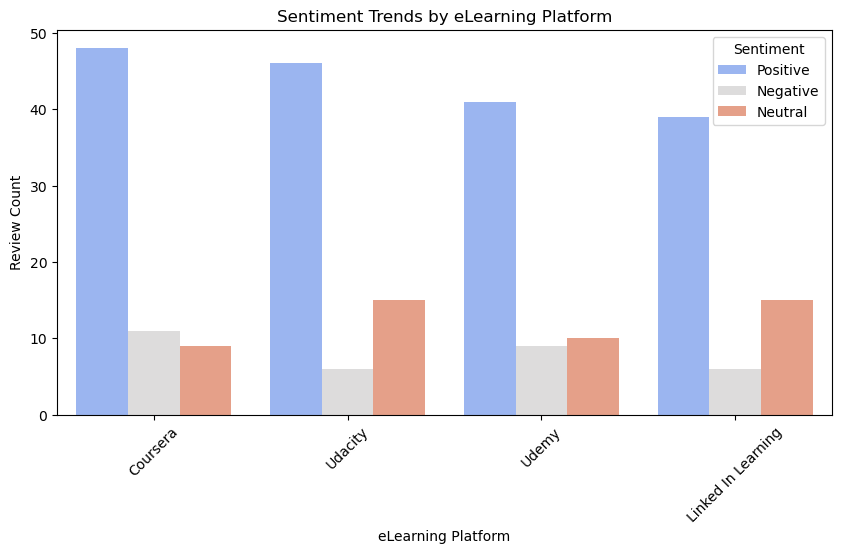

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="E-Platform", hue="Sentiment", palette="coolwarm", order=df["E-Platform"].value_counts().index)
plt.title("Sentiment Trends by eLearning Platform")
plt.xlabel("eLearning Platform")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()


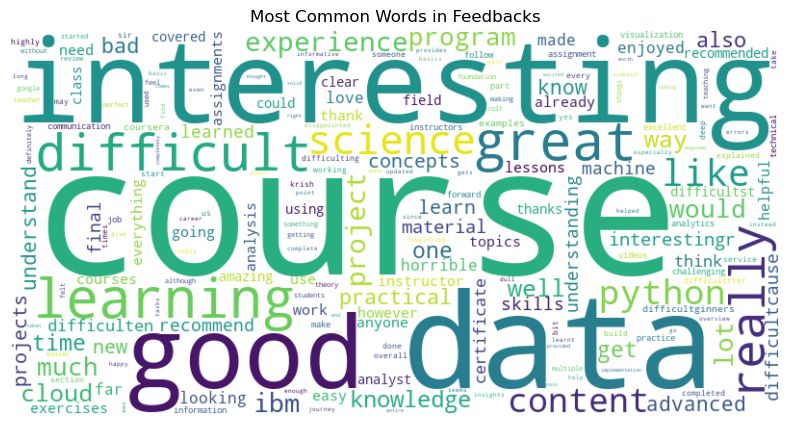

In [42]:
# Define stopwords
stop_words = set(stopwords.words("english"))

# Combine all feedbacks into one large text string
text = " ".join(df["Feedbacks"].dropna())

# Tokenize and remove stopwords
words = word_tokenize(text)
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_words)

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Feedbacks")
plt.show()


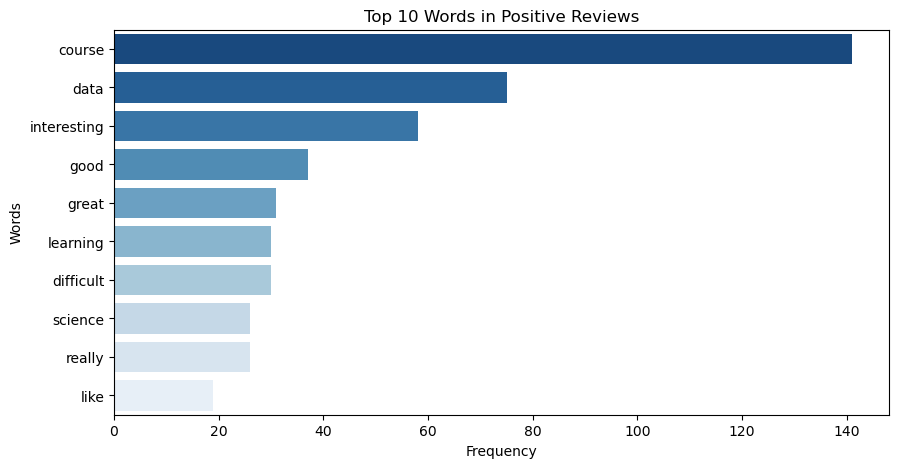

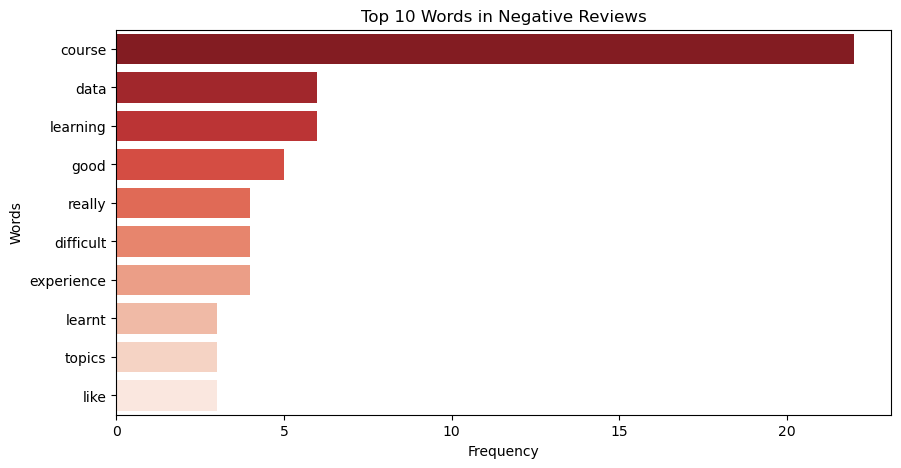

In [43]:
def get_frequent_words(sentiment_label, num_words=10):
    text = " ".join(df[df["Sentiment"] == sentiment_label]["Feedbacks"].dropna())
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    word_freq = Counter(filtered_words)
    return pd.DataFrame(word_freq.most_common(num_words), columns=["Word", "Frequency"])

# Get top words
positive_words_df = get_frequent_words("Positive")
negative_words_df = get_frequent_words("Negative")

# Plot Top 10 Words in Positive Reviews
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=positive_words_df, palette="Blues_r")
plt.title("Top 10 Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Plot Top 10 Words in Negative Reviews
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=negative_words_df, palette="Reds_r")
plt.title("Top 10 Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


In [44]:
# Remove rows where 'Feedbacks' is NaN
df = df.dropna(subset=["Feedbacks"])

# Alternatively, replace NaN with an empty string (less recommended)
df["Feedbacks"] = df["Feedbacks"].fillna("")

# Confirm no missing values exist
print("Missing values in 'Feedbacks':", df["Feedbacks"].isna().sum())


Missing values in 'Feedbacks': 0


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Convert Sentiment labels to numeric
df["Sentiment_Label"] = df["Sentiment"].map({"Positive": 1, "Neutral": 0, "Negative": -1})

# Split dataset (after handling missing values)
X_train, X_test, y_train, y_test = train_test_split(df["Feedbacks"], df["Sentiment_Label"], test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naïve Bayes Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7843137254901961

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00         7
           1       0.78      1.00      0.88        40

    accuracy                           0.78        51
   macro avg       0.26      0.33      0.29        51
weighted avg       0.62      0.78      0.69        51



C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Convert Sentiment labels to numeric
df["Sentiment_Label"] = df["Sentiment"].map({"Positive": 1, "Neutral": 0, "Negative": -1})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df["Feedbacks"], df["Sentiment_Label"], test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naïve Bayes Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7843137254901961

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00         7
           1       0.78      1.00      0.88        40

    accuracy                           0.78        51
   macro avg       0.26      0.33      0.29        51
weighted avg       0.62      0.78      0.69        51



C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert feedback text into count-based features
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
text_matrix = vectorizer.fit_transform(df["Feedbacks"].dropna())

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topics
lda_model.fit(text_matrix)

# Extract top words per topic
words = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]  # Top 10 words per topic
    topics[f"Topic {topic_idx+1}"] = top_words

# Display discovered topics
topics_df = pd.DataFrame(topics)
print("Top Topics in Student Feedback:")
display(topics_df)


Top Topics in Student Feedback:


,Topic 1,Topic 2,Topic 3
0,python,like,clear
1,really,learning,understand
2,good,experience,understanding
3,learning,lot,content
4,great,program,learning
5,science,course,ibm
6,difficult,really,interesting
7,interesting,interesting,cloud
8,data,great,data
9,course,good,course


In [15]:
!pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/77/d4/5f91c30caa32fa82364d716be900b060118232a946e7b0f456f4c56321a4/shap-0.47.0-cp311-cp311-win_amd64.whl.metadata
  Using cached shap-0.47.0-cp311-cp311-win_amd64.whl.metadata (25 kB)
Using cached shap-0.47.0-cp311-cp311-win_amd64.whl (530 kB)


In [17]:
import numpy as np
print("NumPy Version:", np.__version__)


NumPy Version: 1.26.4


In [19]:
!pip install numpy==1.24


In [21]:
!pip install --upgrade numba shap


In [23]:
conda install numba shap -c conda-forge


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1




In [24]:
import shap
print("SHAP successfully installed!")


SHAP successfully installed!


  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\91984\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\91984\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


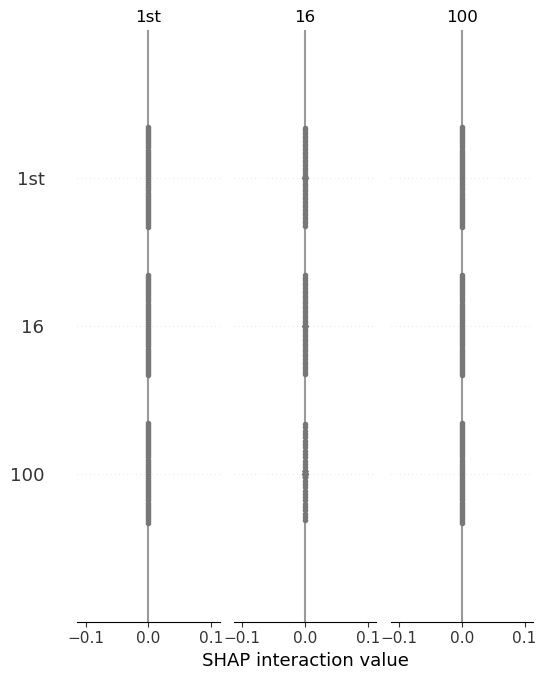

In [47]:
import shap
import numpy as np

# Ensure SHAP uses the same feature transformation as the trained model
X_explainer = X_train_tfidf[:100]  # Use training data to ensure consistent feature count

# Wrapper function to make Naïve Bayes model SHAP-compatible
def model_predict(X):
    return model.predict_proba(X)

# Define SHAP Kernel Explainer with the wrapped function
explainer = shap.KernelExplainer(model_predict, X_explainer)

# Compute SHAP values (Reduce sample size for performance)
shap_values = explainer.shap_values(X_explainer[:50])

# Plot SHAP summary
shap.summary_plot(shap_values, X_explainer[:50], feature_names=vectorizer.get_feature_names_out())
